In [4]:
import numpy as np

## 실습 1. Accuracy, Precision, Recall and F1-score

In [9]:
# data (1 : positive, 2 : negative)

# class 1
pred1 = np.array([1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1])
label1 = np.array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2])

In [10]:
def confusion_mat(pred, label):
    assert len(pred) == len(label), "Lengths of pred and label must be equal."
    matrix = np.zeros((2, 2), dtype=int)
    for p, l in zip(pred, label):
        matrix[p - 1, l - 1] += 1
    return matrix

matrix = confusion_mat(pred1, label1)

In [11]:
def accuracy(matrix):
    return np.trace(matrix) / np.sum(matrix)

def precision(matrix):
    return matrix[0, 0] / (matrix[0, 0] + matrix[0, 1])

def recall(matrix):
    return matrix[0, 0] / (matrix[0, 0] + matrix[1, 0])

def f1_score(precision, recall):
    return 2 * precision * recall / (precision + recall)

In [12]:
acc = accuracy(matrix)
prec = precision(matrix)
rec = recall(matrix)
f1 = f1_score(prec, rec)

# 결과 출력
print(f"Confusion Matrix:\n{matrix}")
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
[[6 7]
 [4 3]]
Accuracy: 0.45
Precision: 0.46
Recall: 0.60
F1 Score: 0.52


## 실습 2. Micro & Macro averaged precision

In [13]:
# data (1 : positive, 2 : negative)

# class 1
pred1 = np.array([1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1])
label1 = np.array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2])

# class 2
pred2 = np.array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1])
label2 = np.array([2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1])

In [14]:
matrix1 = confusion_mat(pred1, label1)
matrix2 = confusion_mat(pred2, label2)

In [15]:
def micro_averaged_precision(matrices):
    total_tp = sum([m[0, 0] for m in matrices])
    total_fp = sum([m[0, 1] for m in matrices])
    return total_tp / (total_tp + total_fp)

def macro_averaged_precision(matrices):
    precisions = [precision(m) for m in matrices]
    return np.mean(precisions)


In [16]:
matrices = [matrix1, matrix2]

micro_avg_prec = micro_averaged_precision(matrices)
macro_avg_prec = macro_averaged_precision(matrices)

print(f"Micro-averaged Precision: {micro_avg_prec:.2f}")
print(f"Macro-averaged Precision: {macro_avg_prec:.2f}")


Micro-averaged Precision: 0.53
Macro-averaged Precision: 0.61


## 실습 3. mean Average Precision

In [20]:
import matplotlib.pyplot as plt

In [21]:
conf = np.array([0.85, 0.87, 0.82, 0.71, 0.45, 0.75, 0.73, 0.9, 0.93, 0.95, 0.94, 0.92, 0.91, 0.74, 0.76, 0.45, 0.72, 0.87, 0.84, 0.84])
label = np.array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])
threshold_list = np.array([0.95, 0.94, 0.93, 0.92, 0.91, 0.90, 0.87, 0.87, 0.85, 0.84, 0.84, 0.82, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.45, 0.45])

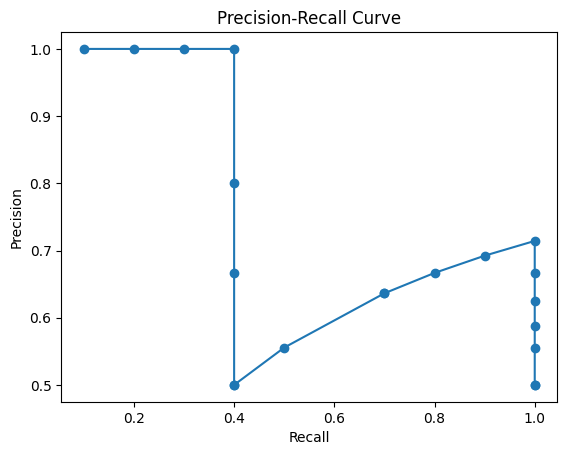

Mean Average Precision (mAP): 0.62


In [22]:
def cal_mAP(conf, label, threshold_list):
    def confusion_matrix(predictions, labels):
        tp = np.sum((predictions == 1) & (labels == 1))
        tn = np.sum((predictions == 0) & (labels == 0))
        fp = np.sum((predictions == 1) & (labels == 0))
        fn = np.sum((predictions == 0) & (labels == 1))
        return np.array([[tp, fp], [fn, tn]])

    def precision(matrix):
        tp, fp = matrix[0]
        return tp / (tp + fp) if (tp + fp) != 0 else 0

    def recall(matrix):
        tp, fn = matrix[:, 0]
        return tp / (tp + fn) if (tp + fn) != 0 else 0

    precision_vals = []
    recall_vals = []
    
    for t in threshold_list:
        predictions = (conf >= t).astype(int)
        matrix = confusion_matrix(predictions, label)
        precision_val = precision(matrix)
        recall_val = recall(matrix)
        precision_vals.append(precision_val)
        recall_vals.append(recall_val)

    sorted_recall, sorted_precision = zip(*sorted(zip(recall_vals, precision_vals)))
    
    mAP = 0
    for i in range(1, len(sorted_precision)):
        mAP += (sorted_recall[i] - sorted_recall[i-1]) * sorted_precision[i]
        
    plt.plot(recall_vals, precision_vals, marker='o')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()
    
    return mAP

mAP = cal_mAP(conf, label, threshold_list)
print(f"Mean Average Precision (mAP): {mAP:.2f}")


## Extra problem

In [66]:
from dataset.mnist import load_mnist

(train_raw_img, train_label), (test_raw_img, test_label) = load_mnist(flatten=False, normalize=False)
print(train_raw_img.shape)
print(train_label.shape)
np.unique(train_label, return_counts=True)
# train_dataset split according to the number

new_train_img = [[] for _ in range(10)]
new_train_label = [[] for _ in range(10)]

for i in range(len(train_label)) :
    new_train_img[train_label[i]].append(train_raw_img[i])
    new_train_label[train_label[i]].append(train_label[i])


(60000, 1, 28, 28)
(60000,)


In [67]:
def make_sample(idx) :
    sample_img = []
    sample_label = []
    
    # data sampling 
    for i in range(10) :
        if i == idx :
            sample_img += new_train_img[i][:1000]
            sample_label += (new_train_label[i][:1000])
        else :
            sample_img += new_train_img[i][:111]
            sample_label += (new_train_label[i][:111])

    sample_img = np.array(sample_img)
    sample_label = np.array(sample_label)
    
    # normalization (set value 0 ~ 1)
    sample_img = sample_img.astype('float')/255
    
    # target number는 1, 아니면 0
    sample_label = np.where(sample_label==idx, 1 ,0)
    
    # reshape
    sample_img = sample_img.reshape(len(sample_img.squeeze()), -1)
    sample_label = sample_label.reshape(len(sample_label.squeeze()), -1)
    
    return sample_img, sample_label

In [68]:
# cross entropy loss
def CrossEntropyLoss(w, X, y) :
    delta = 1e-7
    
    preds = 1 / (1+np.exp(-X.dot(w)))
    loss = np.sum(-y*np.log(preds+delta)-(1-y)*np.log(1-preds+delta))/len(preds)
        
    return loss , preds

In [77]:
# eval (accuracy)

def eval(idx, w) :
    """_summary_

    Args:
        idx : target_number
        w : parameter
    """
    test_X = test_raw_img.astype('float')/255    
    test_X = test_X.reshape(len(test_X.squeeze()), -1)
    test_X = np.insert(test_X, 0, 1, axis=1) # + bias

    test_y = np.where(test_label==idx, 1 ,0)
    test_y = test_y.reshape(len(test_y.squeeze()), -1)
    
    preds = 1/(1+np.exp(-test_X.dot(w)))
    result = np.where(preds>0.5, 1, 0)
    
    acc = np.sum(np.where(result==test_y, True, False))/len(preds)
    
    return acc, result , test_y
    # print('accuracy : ', acc)

In [78]:
def train(X, y, index) :
    """_summary_

    Args:
        X : train_X
        y : train_y

    Returns:
        w : weight
        
    (추가)index : 
        (추가)index = to take evaluation for each digit 
        (추가)the range of it is 0 ~ 9
    """
    w = np.random.randn(len(X[0]), 1)
    lr = 0.1 # learning rate(수정 가능)
    step = 0
    acc = 0
    prev_loss = float('inf')
    J_history = list()
    ACC_history = list()
    
    while (acc <= 0.95) :
        step += 1
        
        acc, predict, test_set = eval(index, w)
        
        loss, preds = CrossEntropyLoss(w, X, y)
        
        diff = preds - y
        gradient = X.T.dot(diff) / X.shape[0]
        w -= lr * gradient
        
        if abs(loss - prev_loss) < 1e-4:
            break
        
        prev_loss = loss
        J_history.append(loss)
        ACC_history.append(acc)
        print("total step : %d " % step)
        print("error : %f, accuarcy : %f" % (loss, acc))
        
    return w, J_history, ACC_history, predict, test_set

In [79]:
train_0X, train_0y = make_sample(idx = 0) # idx = target number
train_0X = np.insert(train_0X, 0, 1, axis=1) # bias 추가
w0,J0_history, ACC0_history, result_0, test_0 = train(train_0X, train_0y,0)

train_1X, train_1y = make_sample(idx = 1) # idx = target number
train_1X = np.insert(train_1X, 0, 1, axis=1) # bias 추가
w1,J1_history, ACC1_history, result_1, test_1 = train(train_1X, train_1y,1)

train_2X, train_2y = make_sample(idx = 2) # idx = target number
train_2X = np.insert(train_2X, 0, 1, axis=1) # bias 추가
w2,J2_history, ACC2_history , result_2, test_2  = train(train_2X, train_2y,2)

train_3X, train_3y = make_sample(idx = 3) # idx = target number
train_3X = np.insert(train_3X, 0, 1, axis=1) # bias 추가
w3,J3_history, ACC3_history, result_3, test_3 = train(train_3X, train_3y,3)

train_4X, train_4y = make_sample(idx = 4) # idx = target number
train_4X = np.insert(train_4X, 0, 1, axis=1) # bias 추가
w4,J4_history, ACC4_history, result_4, test_4 = train(train_4X, train_4y,4)

train_5X, train_5y = make_sample(idx = 5) # idx = target number
train_5X = np.insert(train_5X, 0, 1, axis=1) # bias 추가
w5,J5_history, ACC5_history, result_5, test_5 = train(train_5X, train_5y,5)

train_6X, train_6y = make_sample(idx = 6) # idx = target number
train_6X = np.insert(train_6X, 0, 1, axis=1) # bias 추가
w6,J6_history, ACC6_history, result_6, test_6 = train(train_6X, train_6y,6)

train_7X, train_7y = make_sample(idx = 7) # idx = target number
train_7X = np.insert(train_7X, 0, 1, axis=1) # bias 추가
w7,J7_history, ACC7_history, result_7, test_7 = train(train_7X, train_7y,7)

train_8X, train_8y = make_sample(idx = 8) # idx = target number
train_8X = np.insert(train_8X, 0, 1, axis=1) # bias 추가
w8,J8_history, ACC8_history, result_8, test_8 = train(train_8X, train_8y,8)

train_9X, train_9y = make_sample(idx = 9) # idx = target number
train_9X = np.insert(train_9X, 0, 1, axis=1) # bias 추가
w9,J9_history, ACC9_history, result_9, test_9 = train(train_9X, train_9y,9)

total step : 1 
error : 4.907148, accuarcy : 0.819200
total step : 2 
error : 3.999028, accuarcy : 0.787700
total step : 3 
error : 3.171977, accuarcy : 0.754700
total step : 4 
error : 2.554599, accuarcy : 0.729500
total step : 5 
error : 2.155145, accuarcy : 0.710100
total step : 6 
error : 1.903626, accuarcy : 0.691500
total step : 7 
error : 1.740735, accuarcy : 0.678400
total step : 8 
error : 1.630282, accuarcy : 0.674200
total step : 9 
error : 1.549851, accuarcy : 0.672700
total step : 10 
error : 1.486339, accuarcy : 0.673500
total step : 11 
error : 1.432740, accuarcy : 0.676200
total step : 12 
error : 1.385390, accuarcy : 0.679600
total step : 13 
error : 1.342344, accuarcy : 0.683600
total step : 14 
error : 1.302528, accuarcy : 0.687700
total step : 15 
error : 1.265324, accuarcy : 0.694500
total step : 16 
error : 1.230350, accuarcy : 0.699200
total step : 17 
error : 1.197354, accuarcy : 0.703400
total step : 18 
error : 1.166152, accuarcy : 0.709500
total step : 19 
er

In [80]:
# confusion matrix of each class (0~9)

def confusion_mat(pred, label):
    assert len(pred) == len(label), "Lengths of pred and label must be equal."
    matrix = np.zeros((2, 2), dtype=int)
    for p, l in zip(pred, label):
        matrix[p - 1, l - 1] += 1
    return matrix

matrix_0 = confusion_mat(result_0, test_0)
matrix_1 = confusion_mat(result_1, test_1)
matrix_2 = confusion_mat(result_2, test_2)
matrix_3 = confusion_mat(result_3, test_3)
matrix_4 = confusion_mat(result_4, test_4)
matrix_5 = confusion_mat(result_5, test_5)
matrix_6 = confusion_mat(result_6, test_6)
matrix_7 = confusion_mat(result_7, test_7)
matrix_8 = confusion_mat(result_8, test_8)
matrix_9 = confusion_mat(result_9, test_9)

In [81]:
precision_0 = precision(matrix_0)
precision_1 = precision(matrix_1)
precision_2 = precision(matrix_2)
precision_3 = precision(matrix_3)
precision_4 = precision(matrix_4)
precision_5 = precision(matrix_5)
precision_6 = precision(matrix_6)
precision_7 = precision(matrix_7)
precision_8 = precision(matrix_8)
precision_9 = precision(matrix_9)

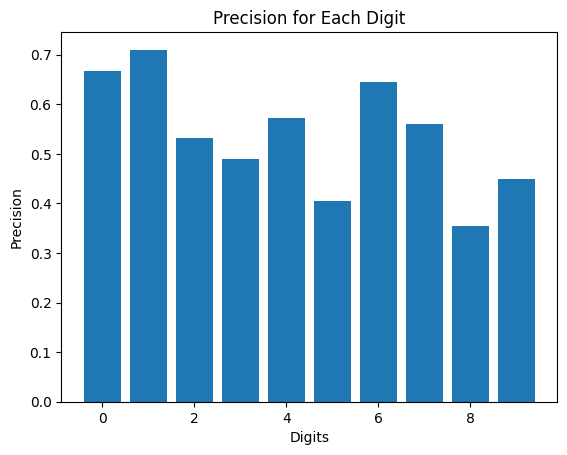

In [84]:
import matplotlib.pyplot as plt

# precision 값들을 리스트로 저장
precisions = [
    precision_0, precision_1, precision_2, precision_3,
    precision_4, precision_5, precision_6, precision_7,
    precision_8, precision_9
]

# x축에 해당하는 레이블 (0~9)
digits = list(range(10))

# 막대 그래프 생성
plt.bar(digits, precisions)

# 그래프 제목 및 축 레이블 설정
plt.title("Precision for Each Digit")
plt.xlabel("Digits")
plt.ylabel("Precision")

# 그래프 출력
plt.show()


In [87]:
# macro & micro averaged precision

matrices = [matrix_0,
matrix_1,
matrix_2,
matrix_3,
matrix_4,
matrix_5,
matrix_6,
matrix_7,
matrix_8,
matrix_9
]

micro_avg_prec = micro_averaged_precision(matrices)
macro_avg_prec = macro_averaged_precision(matrices)

print(f"Micro-averaged Precision: {micro_avg_prec:.2f}")
print(f"Macro-averaged Precision: {macro_avg_prec:.2f}")

Micro-averaged Precision: 0.52
Macro-averaged Precision: 0.54
